In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

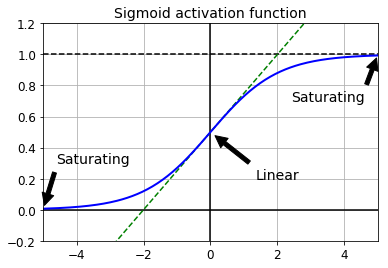

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [8]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [12]:
hisory = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 70us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8883 - val_accuracy: 0.7152
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6816 - accuracy: 0.7727 - val_loss: 0.6356 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6215 - accuracy: 0.7935 - val_loss: 0.5922 - val_accuracy: 0.8012
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5830 - accuracy: 0.8081 - val_loss: 0.5596 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.5553 - accuracy: 0.8155 - val_loss: 0.5338 - val_accuracy: 0.8240
Epoch 7/10
55000/55000 [==============================] -

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=keras.optimizers.SGD(lr=1e-3), 
    metrics=["accuracy"])

hisory = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 1.3470 - accuracy: 0.6225 - val_loss: 0.9268 - val_accuracy: 0.7200
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.8208 - accuracy: 0.7357 - val_loss: 0.7322 - val_accuracy: 0.7640
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.6494 - val_accuracy: 0.7868
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6332 - accuracy: 0.7904 - val_loss: 0.6027 - val_accuracy: 0.8024
Epoch 5/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5918 - accuracy: 0.8051 - val_loss: 0.5674 - val_accuracy: 0.8140
Epoch 6/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5619 - accuracy: 0.8140 - val_loss: 0.5393 - val_accuracy: 0.8252
Epoch 7/10
55000/55000 [==============================] -

In [14]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

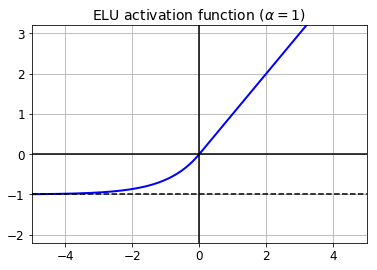

In [15]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [16]:
keras.layers.Dense(10, activation="elu")

In [17]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [18]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

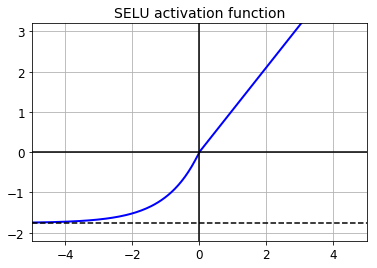

In [19]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [20]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()

    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std, deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std, deviation 1.00
Layer 100: mean 0.02, std, deviation 0.96
Layer 200: mean 0.01, std, deviation 0.90
Layer 300: mean -0.02, std, deviation 0.92
Layer 400: mean 0.05, std, deviation 0.89
Layer 500: mean 0.01, std, deviation 0.93
Layer 600: mean 0.02, std, deviation 0.92
Layer 700: mean -0.02, std, deviation 0.90
Layer 800: mean 0.05, std, deviation 0.83
Layer 900: mean 0.02, std, deviation 1.00


In [21]:
keras.layers.Dense(
    10,
    activation="selu",
    kernel_initializer="lecun_normal"
)

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(1e-3),
    metrics=["accuracy"]
)

In [24]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [25]:
hisory = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 33s 592us/sample - loss: 1.3654 - accuracy: 0.4650 - val_loss: 1.3350 - val_accuracy: 0.4226
Epoch 2/5
55000/55000 [==============================] - 26s 473us/sample - loss: 1.0764 - accuracy: 0.5620 - val_loss: 0.8297 - val_accuracy: 0.6720
Epoch 3/5
55000/55000 [==============================] - 26s 469us/sample - loss: 0.7583 - accuracy: 0.7122 - val_loss: 0.6718 - val_accuracy: 0.7572
Epoch 4/5
55000/55000 [==============================] - 26s 466us/sample - loss: 0.6541 - accuracy: 0.7585 - val_loss: 0.6227 - val_accuracy: 0.7784
Epoch 5/5
55000/55000 [==============================] - 26s 479us/sample - loss: 0.6078 - accuracy: 0.7786 - val_loss: 0.5928 - val_accuracy: 0.7966


In [26]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 18s 330us/sample - loss: 1.8183 - accuracy: 0.2622 - val_loss: 1.2275 - val_accuracy: 0.4776
Epoch 2/15
55000/55000 [==============================] - 15s 276us/sample - loss: 1.1048 - accuracy: 0.5380 - val_loss: 0.9821 - val_accuracy: 0.5538
Epoch 3/15
55000/55000 [==============================] - 15s 267us/sample - loss: 0.9367 - accuracy: 0.6199 - val_loss: 0.8287 - val_accuracy: 0.6860
Epoch 4/15
55000/55000 [==============================] - 15s 269us/sample - loss: 0.7906 - accuracy: 0.6868 - val_loss: 0.7166 - val_accuracy: 0.7484
Epoch 5/15
55000/55000 [==============================] - 15s 271us/sample - loss: 0.6905 - accuracy: 0.7417 - val_loss: 0.6236 - val_accuracy: 0.7564
Epoch 6/15
55000/55000 [==============================] - 15s 274us/sample - loss: 0.7059 - accuracy: 0.7347 - val_loss: 0.6808 - val_accuracy: 0.7608
Epoch 7/15
55000/55000 [=====================

## Batch Normalization

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [29]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [30]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [31]:
bn2 = model.layers[3]
bn2.updates

[<tf.Operation 'cond_2/Identity' type=Identity>,
 <tf.Operation 'cond_3/Identity' type=Identity>]

In [32]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.8767 - accuracy: 0.7137 - val_loss: 0.5532 - val_accuracy: 0.8208
Epoch 2/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.5755 - accuracy: 0.8018 - val_loss: 0.4759 - val_accuracy: 0.8458
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5154 - accuracy: 0.8212 - val_loss: 0.4395 - val_accuracy: 0.8542
Epoch 4/10
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4842 - accuracy: 0.8312 - val_loss: 0.4161 - val_accuracy: 0.8594
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4561 - accuracy: 0.8424 - val_loss: 0.4003 - val_accuracy: 0.8644
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4400 - accuracy: 0.8468 - val_loss: 0.3884 - val_accuracy: 0.8702
Epoch 7/10
55000/55000 [==============================] 

有时候，在激活函数之前使用BN，能够取得更好的结果，这这种情况下，BN前的layer不需要bias，可以通过设置`use_bias=False`

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.8524 - accuracy: 0.7145 - val_loss: 0.5589 - val_accuracy: 0.8098
Epoch 2/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.5754 - accuracy: 0.8017 - val_loss: 0.4820 - val_accuracy: 0.8350
Epoch 3/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5157 - accuracy: 0.8220 - val_loss: 0.4454 - val_accuracy: 0.8486
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4808 - accuracy: 0.8320 - val_loss: 0.4213 - val_accuracy: 0.8522
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4549 - accuracy: 0.8412 - val_loss: 0.4063 - val_accuracy: 0.8584
Epoch 6/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4374 - accuracy: 0.8475 - val_loss: 0.3951 - val_accuracy: 0.8630
Epoch 7/10
55000/55000 [==============================] -

## Gradient Clipping
对梯度的裁剪，可能让梯度向量改变方向，比如\[0.9, 100\]，如果裁剪到\[-1.0, 1.0\]的范围的结果是\[0.9, 1.0\],这就改变了向量的方向。
如果不想改变方向，可以使用`clipnorm`，它会对整个向量做长度的修改。

In [34]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [35]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers
当我们需要训练一个大型的深度网络模型时，如果每次都重新训练，显然是不明智的。我们应该尽可能的找到与该任务相似的已经训练好的网络模型，然后复用底层的隐藏层。
这么做的原理是：神经网络的结果是分层的，低层的隐藏层描述的特征更加简单。
这种复用隐藏层的技术成为**transfer learning**，它有两大优点：
- 极大的提升训练速度
- 可以使用更少的训练数据

举个例子，假如我们已经有了一个把图片分为100类的模型（识别动物，人，车辆等等）。我们新的模型的要求是能够识别机动车，这两个任务就很相似，我们可以复用原模型的多个低隐藏层，如下图所示：

![](https://i.loli.net/2019/10/23/wvHZ41glaGfnCts.png)

可以看出，在复用隐藏层时，可以灵活的固定住某些层，模型在训练过程中，就不会更新这些固定层的梯度。

提示：如果复用模型的输入数据跟新模型不同，需要多写一个处理层，来适配这些数据。

原模型的较高层次的隐藏层，可能对新模型用处不大，因此，就需要我们找到最佳的复用层数。一般原则是，任务越相似，复用的层数就越多。

步骤如下：

1. 先固定住所有的复用层，查看性能
2. 解冻最上层的一个或多个隐藏层，查看性能，训练数据越多，可解冻的隐藏层越多
3. 如果性能还不好，可以移除最上边的隐藏层

### Transfer Learning with Keras
我们现在举一个例子。假如Fashion MNIST数据集中只包含8个类别，不包含sandal和shirt。我们先训练一个模型A对其8个类别进行分类，然后训练模型B，对sandal和shirt做二进制分类，+1表示sandal，其他表示shirt。

首先我们从Fashion MNIST中分离出我们需要的数据。

In [38]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # 5或6的索引
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

In [54]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [55]:
X_train_A.shape

(43986, 28, 28)

In [56]:
X_train_B.shape

(200, 28, 28)

In [57]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [58]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [59]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 85us/sample - loss: 0.5909 - accuracy: 0.8100 - val_loss: 0.3772 - val_accuracy: 0.8712
Epoch 2/20
43986/43986 [==============================] - 3s 75us/sample - loss: 0.3520 - accuracy: 0.8793 - val_loss: 0.3393 - val_accuracy: 0.8782
Epoch 3/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.3167 - accuracy: 0.8889 - val_loss: 0.3016 - val_accuracy: 0.8961
Epoch 4/20
43986/43986 [==============================] - 3s 74us/sample - loss: 0.2969 - accuracy: 0.8967 - val_loss: 0.2858 - val_accuracy: 0.9031
Epoch 5/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.2824 - accuracy: 0.9032 - val_loss: 0.2807 - val_accuracy: 0.9063
Epoch 6/20
43986/43986 [==============================] - 3s 75us/sample - loss: 0.2721 - accuracy: 0.9071 - val_loss: 0.2683 - val_accuracy: 0.9103
Epoch 7/20
43986/43986 [==============================] -

In [60]:
model_A.save("my_model_A.h5")

In [61]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 4ms/sample - loss: 0.9545 - accuracy: 0.4600 - val_loss: 0.6655 - val_accuracy: 0.5385
Epoch 2/20
200/200 [==============================] - 0s 355us/sample - loss: 0.5899 - accuracy: 0.6900 - val_loss: 0.4785 - val_accuracy: 0.8519
Epoch 3/20
200/200 [==============================] - 0s 364us/sample - loss: 0.4512 - accuracy: 0.8800 - val_loss: 0.4098 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 373us/sample - loss: 0.3871 - accuracy: 0.9100 - val_loss: 0.3666 - val_accuracy: 0.9128
Epoch 5/20
200/200 [==============================] - 0s 366us/sample - loss: 0.3438 - accuracy: 0.9250 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 6/20
200/200 [==============================] - 0s 366us/sample - loss: 0.3095 - accuracy: 0.9300 - val_loss: 0.3034 - val_accuracy: 0.9402
Epoch 7/20
200/200 [==============================] - 0s 413us/sample - loss: 0.

In [62]:
model_B.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_238 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_239 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_240 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_241 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_242 (Dense)            (None, 1)               

In [63]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [64]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [65]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

In [66]:
hisory = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

hisory = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.5807 - accuracy: 0.6550 - val_loss: 0.5813 - val_accuracy: 0.6450
Epoch 2/4
200/200 [==============================] - 0s 333us/sample - loss: 0.5425 - accuracy: 0.7050 - val_loss: 0.5468 - val_accuracy: 0.6815
Epoch 3/4
200/200 [==============================] - 0s 337us/sample - loss: 0.5086 - accuracy: 0.7200 - val_loss: 0.5164 - val_accuracy: 0.7140
Epoch 4/4
200/200 [==============================] - 0s 376us/sample - loss: 0.4784 - accuracy: 0.7600 - val_loss: 0.4870 - val_accuracy: 0.7292
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 2s 8ms/sample - loss: 0.3964 - accuracy: 0.8200 - val_loss: 0.3384 - val_accuracy: 0.8722
Epoch 2/16
200/200 [==============================] - 0s 398us/sample - loss: 0.2752 - accuracy: 0.9300 - val_loss: 0.2612 - val_accuracy: 0.9260
Epoch 3/16
200/200 [====================

In [67]:
model_B.evaluate(X_test_B, y_test_B)

[0.1444666212797165, 0.9695]

In [68]:
model_B_on_A.evaluate(X_test_B, y_test_B)

[0.06899205100536346, 0.9925]

In [69]:
(100 - 96.95) / (100 - 99.25)

4.066666666666663

### Unsupervised Pretraining
适用于当任务很复杂，标记的训练数据很少的情况。如下图所示：

![](https://i.loli.net/2019/10/23/OYXRZKMGf5sDmui.png)

无监督预训练首先使用未标记的数据一层一层的训练隐藏层，最后再使用标记数据做监督训练。

==这是但标记数据很少的情况下的一个方法。==

### Pretraining on an Auxiliary Task
这同样是在只有少量标记数据的情况下的解决方案，它的核心思想是首先训练与当前任务相关的模型，然后复用模型的lower隐藏层。

举个例子，比如想训练一个人脸识别模型，但是没有足够的数，很难收集到非常多的某个人的一组脸部照片，但是，我们可以在网上收集到很多照片，然后利用这些照片训练一个识别两个照片是否是同一个人，这么一个模型，然后复用模型的lower隐藏层。

## Faster Optimizers
如果训练一个大型的深度网络模型，可能会非常慢。到目前为止， 我们已经学习了4种提升速度的方法：

- 使用更好的weights
- 使用更好的激活函数
- 使用BN
- 复用lower隐藏层

本小节将引入另外一个可以显著提升速度的方法，**使用更快的optimizer**

### Momentum Optimization
想象一个小球在一个巨大的碗的边缘自由下落，小球一开始很慢，但随着时间的推移，速度越来越快，直到达到一个极限速度（空摩擦力或空气阻力）。小球速度之所以能越来越来，就是因为它在运动的过程中，获得了动量。

普通的梯度下降算法，每次迭代都使用同样的step，因此，遇到斜率很小的代价函数，到达极值的时间就会很长。

梯度下降的公式是：

$${\bf {\theta}} \leftarrow {\bf {\theta}} - \eta \nabla_{\theta}J({\bf {\theta}})$$

从上边的公式就可以看出，如果梯度变得很小，学习就会非常慢。

Momentum算法的公式：

$$
\begin{equation}
1. \quad {\bf {m}} \leftarrow \beta {\bf {m}} - \eta \nabla_{\theta}J({\bf {\theta}}) \\
2. \quad {\bf {\theta}} \leftarrow {\bf {\theta}} + {\bf {m}} 
\end{equation}
$$

Momentum算法的核心是：累计动量。那么动量是如何累计的呢？

假设上边的公式中的向量m初始值为0，那么随着迭代的进行，它的值会逐渐累计，并指向学习的方向。但是它并不会一直增大下去。

很容易验证，它的极限为$gradient \times \eta \times \frac{1}{1-\beta}$,也就是说，如果$\beta=0.9$的话，那么最大的m是10倍的梯度乘以学习率。

如果没用使用Batch Normalization技术标准化每一层的输入，那么每一层的scale很可能不一样，这就会造成不同方向的学习速度的不一样，有的速度很快，有的速度比较慢。

提示：Momentum算法可能会越过极值点，然后再荡回来，这就是设置$\beta$的原因。

In [70]:
optimizer = keras.optimizers.SGD(lr=1e-3, momentum=0.9)

### Nesterov Accelerated Gradient
Nesterov Accelerated Gradient算法的核心思想是，动量向量的方向指向极值的方向，使用当前点的下一个方向上的点。

公式如下：

$$
\begin{equation}
{\bf {m}} \leftarrow \beta {\bf {m}} - \eta \nabla_{\theta}J({\bf {\theta}} + \beta {\bf {m}}) \\
{\bf {\theta}} \leftarrow {\bf {\theta}} + {\bf {m}} 
\end{equation}
$$

他比Momentum更快，如下图所示：

![](https://i.loli.net/2019/10/24/amQoIrFL84GfROt.png)

### AdaGrad
AdaGrad的核心思想是调整学习率，也就是调整各个方向上的学习率。调整的核心是记录各个方向上的梯度的平方和。

公式如下：

$$
\begin{equation}
{\bf {s}} \leftarrow {\bf {s}} + \nabla_{\theta}J({\bf {\theta}}) \otimes \nabla_{\theta}J({\bf {\theta}}) \\
{\bf {\theta}} \leftarrow {\bf {\theta}} - \eta \nabla_{\theta}J({\bf {\theta}}) \oslash \sqrt{{\bf {s}} + \epsilon}
\end{equation}
$$

过程如下图：

![](https://i.loli.net/2019/10/24/F5I3YSQzEk2CcPO.png)

In [71]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSProp
RMSProp的核心思想是采用指数移动平均数的概念，使梯度的衰减控制在一个比较平滑的范围之内。

公式为：

$$
\begin{equation}
{\bf {s}} \leftarrow \beta {\bf {s}} + (1 - \beta)\nabla_{\theta}J({\bf {\theta}}) \otimes \nabla_{\theta}J({\bf {\theta}}) \\
{\bf {\theta}} \leftarrow {\bf {\theta}} - \eta \nabla_{\theta}J({\bf {\theta}}) \oslash \sqrt{{\bf {s}} + \epsilon}
\end{equation}
$$

In [72]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam and Nadam Optimization
Adam综合了momentum和RMSProp两者的优点，用到了动量和梯度平方的概念。

公式如下：

$$
\begin{equation}
{\bf {m}} \leftarrow \beta_1 {\bf {m}} + (1 - \beta_1)\nabla_{\theta}J({\bf {\theta}}) \\
{\bf {s}} \leftarrow \beta_2 {\bf {s}} + (1 - \beta_2)\nabla_{\theta}J({\bf {\theta}}) \otimes \nabla_{\theta}J({\bf {\theta}}) \\
\hat{{\bf {m}}} \leftarrow \frac{{\bf {m}}}{1 - \beta_1^T} \\
\hat{{\bf {s}}} \leftarrow \frac{{\bf {s}}}{1 - \beta_2^T} \\
{\bf {\theta}} \leftarrow {\bf {\theta}} + \eta \hat{{\bf {m}}} \oslash \sqrt{ \hat{{\bf {s}}} + \epsilon}
\end{equation}
$$

公式的核心概念是指数移动平均数，更加详细的说明参考这个网站[为什么在优化算法中使用指数加权平均](https://www.jianshu.com/p/41218cb5e099)

公式的3，4步的意思指的是，把m由指数移动加权平均数还原到指数加和值。

In [73]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [74]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [75]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

比较一下上边所有算法的优缺点，一星表示bad，二星表示average，三星表示good：

| Class | Convergence speed | Convergence quality|
| ----- | ----- | ----- |
| SGD | * | *** | 
| SGD（momentum=...）| ** | *** |
| SGD（momentum=..., nesterov=True）| ** | *** |
| Aagrad | *** | *(stops too early) | 
| RMSprop | *** | \**or*** | 
| Adam | *** | \*\*or*** | 
| Nadam | *** | \*\*or*** | 
| AdaMax | *** | \*\*or*** |

## Learning Rate Scheduling
在训练过程中，找到一个好的学习率也很重要，它能让算法更快的达到极值。

![](https://i.loli.net/2019/10/25/izJHO56NWs3baET.png)

上图可以看出，学习率设置的太高或者太低都不是很好。

### Power scheduling
Power scheduling的核心思想是，随着迭代的进行，lr逐渐减小。

公式如下：

$$
\eta(t) = \frac{\eta_0}{(1 + t/s)^c}
$$

c表示power， s表示steps， t表示当前的迭代数，随着t的增加，$\eta$会变成$\eta/2, \eta/3....$

keras 使用c=1，s=1/decay

In [76]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

n_epochs = 25

history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4855 - accuracy: 0.8289 - val_loss: 0.4061 - val_accuracy: 0.8616
Epoch 2/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3791 - accuracy: 0.8663 - val_loss: 0.3889 - val_accuracy: 0.8670
Epoch 3/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3461 - accuracy: 0.8761 - val_loss: 0.3636 - val_accuracy: 0.8728
Epoch 4/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3252 - accuracy: 0.8836 - val_loss: 0.3521 - val_accuracy: 0.8768
Epoch 5/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3099 - accuracy: 0.8894 - val_loss: 0.3443 - val_accuracy: 0.8812
Epoch 6/25
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2970 - accuracy: 0.8932 - val_loss: 0.3414 - val_accuracy: 0.8820
Epoch 7/25
55000/55000 [==============================] -

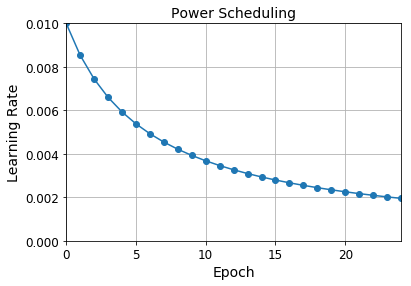

In [77]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential scheduling
Exponential scheduling的核心思想是，lr的衰减呈现指数衰减。

公式如下：

$$
\eta(t) = \eta_00.1^{t/s}
$$

lr的衰减程度为每一个s周期，大概衰减原值的10倍

In [78]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [79]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[lr_scheduler]
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 123us/sample - loss: 0.8791 - accuracy: 0.7481 - val_loss: 0.8047 - val_accuracy: 0.7612
Epoch 2/25
55000/55000 [==============================] - 6s 108us/sample - loss: 0.7890 - accuracy: 0.7654 - val_loss: 0.7888 - val_accuracy: 0.7766
Epoch 3/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.6607 - accuracy: 0.8023 - val_loss: 0.6255 - val_accuracy: 0.8314
Epoch 4/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.5977 - accuracy: 0.8262 - val_loss: 0.5678 - val_accuracy: 0.8278
Epoch 5/25
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5283 - accuracy: 0.8465 - val_loss: 0.5615 - val_accuracy: 0.8504
Epoch 6/25
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4725 - accuracy: 0.8591 - val_loss: 0.5955 - val_accuracy: 0.8574
Epoch 7/25
55000/55000 [===========================

schedule函数还可以通过第二个参数获取当前的学习率，然后做一些额外的操作，比如对当前的lr衰减

In [81]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

上边学习率的更新都在每次epoch开始的时候更新，如果想在每个迭代中更新lr，需要创建自定义的callback类

In [83]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs["lr"] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

n_epochs = 25

s = 20 * len(X_train) // 32
exp_decay = ExponentialDecay(s)

history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[exp_decay]
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 8s 153us/sample - loss: 0.7922 - accuracy: 0.7709 - val_loss: 0.6879 - val_accuracy: 0.7900
Epoch 2/25
55000/55000 [==============================] - 7s 124us/sample - loss: 0.6401 - accuracy: 0.8029 - val_loss: 0.5876 - val_accuracy: 0.8298
Epoch 3/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.5765 - accuracy: 0.8210 - val_loss: 0.6223 - val_accuracy: 0.8178
Epoch 4/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.5156 - accuracy: 0.8404 - val_loss: 0.5083 - val_accuracy: 0.8532
Epoch 5/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4596 - accuracy: 0.8535 - val_loss: 0.4915 - val_accuracy: 0.8472
Epoch 6/25
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4124 - accuracy: 0.8649 - val_loss: 0.4626 - val_accuracy: 0.8698
Epoch 7/25
55000/55000 [===========================

In [84]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

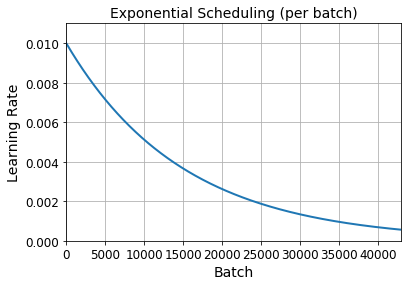

In [85]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [88]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [89]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [91]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 131us/sample - loss: 0.9017 - accuracy: 0.7435 - val_loss: 0.7864 - val_accuracy: 0.7532
Epoch 2/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.9031 - accuracy: 0.7407 - val_loss: 0.7738 - val_accuracy: 0.7734
Epoch 3/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.9237 - accuracy: 0.7175 - val_loss: 1.0919 - val_accuracy: 0.6686
Epoch 4/25
55000/55000 [==============================] - 6s 114us/sample - loss: 1.1101 - accuracy: 0.6459 - val_loss: 1.3089 - val_accuracy: 0.5486
Epoch 5/25
55000/55000 [==============================] - 6s 114us/sample - loss: 1.2241 - accuracy: 0.5921 - val_loss: 1.2293 - val_accuracy: 0.5404
Epoch 6/25
55000/55000 [==============================] - 6s 111us/sample - loss: 0.9199 - accuracy: 0.6487 - val_loss: 0.9619 - val_accuracy: 0.6560
Epoch 7/25
55000/55000 [===========================

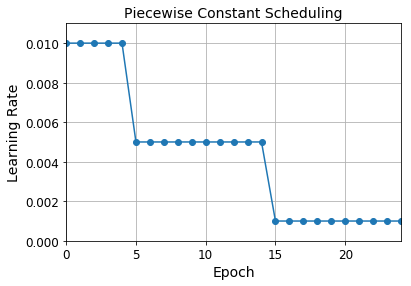

In [92]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [93]:
tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 91us/sample - loss: 0.6036 - accuracy: 0.8052 - val_loss: 0.5546 - val_accuracy: 0.8126
Epoch 2/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5147 - accuracy: 0.8370 - val_loss: 0.5252 - val_accuracy: 0.8346
Epoch 3/25
55000/55000 [==============================] - 4s 82us/sample - loss: 0.5197 - accuracy: 0.8430 - val_loss: 0.4358 - val_accuracy: 0.8590
Epoch 4/25
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5022 - accuracy: 0.8494 - val_loss: 0.5276 - val_accuracy: 0.8514
Epoch 5/25
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5252 - accuracy: 0.8486 - val_loss: 0.5415 - val_accuracy: 0.8492
Epoch 6/25
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4994 - accuracy: 0.8563 - val_loss: 0.7048 - val_accuracy: 0.8370
Epoch 7/25
55000/55000 [==============================] -

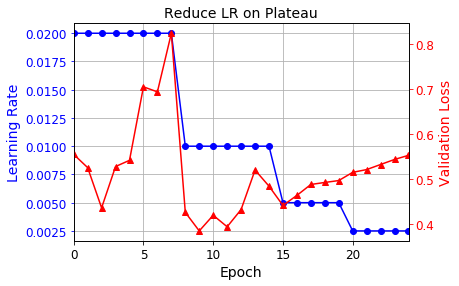

In [94]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras scheduling

In [95]:
s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)

In [97]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001]
)

### 1Cycle scheduling

In [100]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

Train on 55000 samples
55000/55000 [==============================] - 2s 39us/sample - loss: nan - accuracy: 0.3888


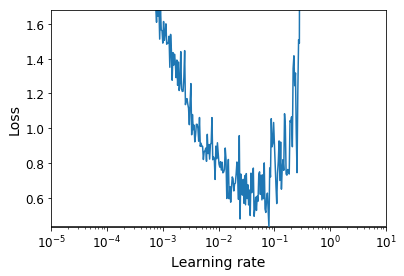

In [101]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [108]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (iter2 - self.iteration) / (iter2 - iter1) + rate1)

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate) 

In [109]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[onecycle]
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4930 - accuracy: 0.8257 - val_loss: 0.4185 - val_accuracy: 0.8550
Epoch 2/25
55000/55000 [==============================] - 2s 31us/sample - loss: 0.3779 - accuracy: 0.8646 - val_loss: 0.3937 - val_accuracy: 0.8636
Epoch 3/25
55000/55000 [==============================] - 2s 31us/sample - loss: 0.3432 - accuracy: 0.8767 - val_loss: 0.3627 - val_accuracy: 0.8726
Epoch 4/25
55000/55000 [==============================] - 2s 30us/sample - loss: 0.3196 - accuracy: 0.8857 - val_loss: 0.3491 - val_accuracy: 0.8760
Epoch 5/25
55000/55000 [==============================] - 2s 31us/sample - loss: 0.3020 - accuracy: 0.8927 - val_loss: 0.3379 - val_accuracy: 0.8804
Epoch 6/25
55000/55000 [==============================] - 2s 31us/sample - loss: 0.2859 - accuracy: 0.8983 - val_loss: 0.3354 - val_accuracy: 0.8838
Epoch 7/25
55000/55000 [==============================] -

## Avoiding Overfitting Through Regularization
在深度学习中，由于有成千上万的参数（w）,很容易引起过拟。为了解决这个问题，我们之前用到了early stpping 和 Batch Normalization技术，这一小节，我们再引进其他三个技术

### $l_1$ and $l_2$ Regularization
这个作用到网络的每一个隐藏层，可以使用`l1()`,`l2()`和`l1_l2()`

In [111]:
layer = keras.layers.Dense(
    100, 
    activation="elu", 
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01)
)
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [112]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(
        300, 
        activation="elu", 
        kernel_initializer="he_normal",
        kernel_regularizer=keras.regularizers.l2(0.01)
        ),
    keras.layers.Dense(
        100, 
        activation="elu", 
        kernel_initializer="he_normal",
        kernel_regularizer=keras.regularizers.l2(0.01)
        ),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 2
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 127us/sample - loss: 1.4885 - accuracy: 0.8115 - val_loss: 0.6481 - val_accuracy: 0.8150
Epoch 2/2
55000/55000 [==============================] - 6s 115us/sample - loss: 0.5965 - accuracy: 0.8336 - val_loss: 0.6226 - val_accuracy: 0.8212


In [113]:
from functools import partial


RegularizedDense = partial(
    keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01)
)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 2
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 130us/sample - loss: 1.6418 - accuracy: 0.8107 - val_loss: 0.7600 - val_accuracy: 0.8068
Epoch 2/2
55000/55000 [==============================] - 6s 117us/sample - loss: 0.7197 - accuracy: 0.8262 - val_loss: 0.7175 - val_accuracy: 0.8254


### Dropout
Dropout是深度学习中的一项热门技术，它的核心原理是，通过一个概率P、让一部分神经元在每一次step中，暂时dropout，也就是输出值设为0.

由于在训练的时候dropout了，那么在test的时候，为了保持两者的期望一样，假如训练中某个神经元的输入为x，概率为p，那么，它输出的期望是px + (1 - p)0 = px, 因此，在test时，要对每个神经元的输出乘以p。或者在训练的时候，对每一个隐藏层的激活值向量做放大处理,乘以1/(1-p).

In [115]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 2
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 131us/sample - loss: 0.5731 - accuracy: 0.8027 - val_loss: 0.3649 - val_accuracy: 0.8690
Epoch 2/2
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4217 - accuracy: 0.8454 - val_loss: 0.3543 - val_accuracy: 0.8606


### Alpha Dropout
对于能够self-normalizing的激活函数，比如selu，应该使用Alpha Dropout

In [116]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

n_epochs = 20
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 93us/sample - loss: 0.6628 - accuracy: 0.7608 - val_loss: 0.5844 - val_accuracy: 0.8396
Epoch 2/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5568 - accuracy: 0.7965 - val_loss: 0.5361 - val_accuracy: 0.8454
Epoch 3/20
55000/55000 [==============================] - 5s 82us/sample - loss: 0.5239 - accuracy: 0.8056 - val_loss: 0.5417 - val_accuracy: 0.8480
Epoch 4/20
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5077 - accuracy: 0.8129 - val_loss: 0.4756 - val_accuracy: 0.8626
Epoch 5/20
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4951 - accuracy: 0.8173 - val_loss: 0.4770 - val_accuracy: 0.8610
Epoch 6/20
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4804 - accuracy: 0.8232 - val_loss: 0.4554 - val_accuracy: 0.8638
Epoch 7/20
55000/55000 [==============================] -

### MC Dropout
MC Dropout的核心思想是，在预测test的时候，依然让神经元dropout， 然后对预测数据做一定数量的预测，取预测结果的平均值或者标准差

In [119]:
tf.random.set_seed(42)
np.random.seed(42)

In [120]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

W1028 16:50:32.019711 140734812820928 base_layer.py:1814] Layer flatten_23 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [121]:
y_std = y_probas.std(axis=0)

In [122]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [123]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.18, 0.  , 0.8 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.11, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.71, 0.  , 0.28]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.07, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.03, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.16, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.17, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.17, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.27, 0.  , 0

In [124]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.14, 0.  , 0.76]],
      dtype=float32)

In [125]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2) 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.16, 0.  , 0.2 ]],
      dtype=float32)

In [126]:
y_pred = np.argmax(y_proba, axis=1)

In [127]:
y_proba.shape

(10000, 10)

In [128]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8664

In [129]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

接下来，我们用上边已有的Alpha模型来生成一个新的MCAlphaDropout模型

In [130]:
tf.random.set_seed(42)
np.random.seed(42)

mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

mc_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_285 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_286 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_287 (Dense)            (None, 10)              

其实MCAlphaDropout做的事情很简单，就是设置layer的training为True

In [131]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [132]:
mc_model.set_weights(model.get_weights())

In [133]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.19, 0.  , 0.7 ]],
      dtype=float32)

### Max norm

In [134]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal", kernel_constraint=keras.constraints.max_norm(1.))

In [135]:
MaxNormDense = partial(
    keras.layers.Dense, 
    activation="selu",
    kernel_initializer="lecun_normal",
    kernel_constraint=keras.constraints.max_norm(1.)
)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

n_epochs = 2
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4762 - accuracy: 0.8327 - val_loss: 0.3840 - val_accuracy: 0.8648
Epoch 2/2
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3597 - accuracy: 0.8685 - val_loss: 0.3604 - val_accuracy: 0.8682


## Summary and Practical Guidelines
上边的内容讲了很多技术，那么在实践中，应该用到哪些呢？可以参考下表：

![](https://i.loli.net/2019/10/28/4DVtEYrSkqbZhwp.png)

如果网络能够self-normalize的话，可以参考下表：

![](https://i.loli.net/2019/10/28/BgTvli9kYc4E8ZD.png)

再加上下边几点建议：

- 如果需要稀松模型，可以使用$l_1$正则化，可选的把极小的w置成0，如果需要更稀松的模型，使用TensorFlow Model Optimization
- 如果需要低延时的模型，用该使用更少的layer，使用Batch Normalizaiton，并且选择更快的激活函数，比如leaky ReLU或者ReLU，后者把数据保存为更小的bit
- 如果需要高精度，可以使用MC Dropout技术

## Exercises
1. 使用He initialization 把weights都初始化为相同的值，是否ok？

```
weights在初始化的时候，不能取相同的值，他们应该是相互独立的。取样weights一个最重要的目标是打破weights
的对称性。只有这样，才能使算法在反向传播的时候，不断更新weights。如果取相同的值，那么每次计算的weights
就会一样。 
```

2. 是否可以把bias初始化为0？

```
完全没什么问题，有些人喜欢想weights那样初始化，这也没什么问题。
```

3. 说出3条SELU相对于ReLU激活函数的优点

```
- SELU激活函数能够返回负值，所以对于隐藏层来说，整体上的输出能够接近于0. 能够处理梯度消失的问题。
- 由于没有0的导数， 因此不会出现ReLU梯度死亡的问题
- 如果条件ok（模型初始化， weights初始化，输入标准化等等），它是self-normalized的，避免梯度消失和爆炸问题
```

4. 使用SELU，leaky ReLU(变种), ReLU, tanh, logistic, softmax的时机？

```
一般情况下，默认使用SELU激活函数，如果你需要你的神经网络越快越好， 可以使用leaky ReLU和它的变种，人们优先选择
ReLU，主要是考虑到它的简易性，虽然它不如SELU和leaky ReLU。但它能够产生0的特性，在某些场景下会比较有用。tanh
激活函数比较使用于输出层，不适用于隐藏层，它能够输入-1到1之间的值。logistic跟tanh差不多。softmax比较适用于
输出层，适合输出多个类别的结果。
```

5. 如果设置momentum的值非常接近于1，比如0.9999999，当使用SGD optimizer的时候，会发生什么？

```
算法会向着最小值加速运动，会越过极值点，然后再反方向加速，如此反复震荡，会比设置较小的值用时长一些。
```

6. 说出生成稀松模型的3种方法？

```
1. 把训练好的模型中的较小的weights置为0
2. 使用$l_1$正则化weights
3. 使用TensorFlow Model Optimization Toolkit
```

7. dropout计算是否降低了训练速度？是否降低了预测速度？ MC Dropout呢？

```
由于dropout新增了很多操作步骤，因此它会是训练时间增长，但它不会影响预测时间，因为它只在训练时起作用。MC 
Dropout在训练时，没什么区别，但是在预测时，它依然使用dropout技术，因此时间会增加。而且需要10倍或者更大
的倍数运行预测步骤。因此这些都会增加预测的时长。
```